In [126]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
#pd.set_option('display.max_rows', None)

In [127]:
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
pio.templates.default = "plotly_dark"

In [128]:
circuits=pd.read_csv('circuits.csv')
constructor_results=pd.read_csv('constructor_results.csv')
constructor_standings=pd.read_csv('constructor_standings.csv')
constructors=pd.read_csv('constructors.csv')
driver_standings=pd.read_csv('driver_standings.csv')
drivers=pd.read_csv('drivers.csv')
lap_times=pd.read_csv('lap_times.csv')
pit_stops=pd.read_csv('pit_stops.csv')
qualifying=pd.read_csv('qualifying.csv')
races=pd.read_csv('races.csv')
results=pd.read_csv('results.csv')
seasons=pd.read_csv('seasons.csv')
status=pd.read_csv('status.csv')

In [129]:
TH_races=races.loc[races['year']>=2014]

In [130]:
qualifying=qualifying.rename(columns={"position":"qualifying_pos"})

In [133]:
qualifying=qualifying.replace("\\N",np.nan)

In [134]:
qualifying['q1']=pd.to_datetime(qualifying['q1'],format="%M:%S.%f")
qualifying['q2']=pd.to_datetime(qualifying['q2'],format="%M:%S.%f")
qualifying['q3']=pd.to_datetime(qualifying['q3'],format="%M:%S.%f")

In [137]:
qualifying['q1_s']=qualifying['q1'].dt.minute*60+qualifying['q1'].dt.second+qualifying['q1'].dt.microsecond*0.000001
qualifying['q2_s']=qualifying['q2'].dt.minute*60+qualifying['q2'].dt.second+qualifying['q2'].dt.microsecond*0.000001
qualifying['q3_s']=qualifying['q3'].dt.minute*60+qualifying['q3'].dt.second+qualifying['q3'].dt.microsecond*0.000001

In [138]:
qualifying.drop(columns=['q1', 'q2', 'q3'],inplace=True)

In [139]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q1_s,q2_s,q3_s
0,1,18,1,1,22,1,86.572,85.187,86.714
1,2,18,9,2,4,2,86.103,85.315,86.869
2,3,18,5,1,23,3,85.664,85.452,87.079
3,4,18,13,6,2,4,85.994,85.691,87.178
4,5,18,2,2,3,5,85.960,85.518,87.236


In [140]:
qualifying['q1min']=qualifying['q1_s']
qualifying['q2min']=qualifying['q2_s']
qualifying['q3min']=qualifying['q3_s']

In [141]:
qualifying=qualifying.merge(qualifying.groupby('raceId').aggregate({'q1min':'min','q2min':'min','q3min':'min'}),left_on='raceId',right_on='raceId')

In [143]:
qualifying=qualifying.rename(columns={"q1min_y":"q1min","q2min_y":"q2min","q3min_y":"q3min"})

In [145]:
qualifying.drop(columns=['q1min_x','q2min_x','q3min_x'],inplace=True)

In [147]:
qualifying['q1_delta']=qualifying['q1min']
qualifying['q2_delta']=qualifying['q2min']
qualifying['q3_delta']=qualifying['q3min']

In [151]:
qualifying['q1_delta']=qualifying['q1_s']-qualifying['q1min']
qualifying['q2_delta']=qualifying['q2_s']-qualifying['q2min']
qualifying['q3_delta']=qualifying['q3_s']-qualifying['q3min']

In [158]:
qualifying.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos', 'q1_s', 'q2_s', 'q3_s', 'q1min', 'q2min', 'q3min',
       'q1_delta', 'q2_delta', 'q3_delta'],
      dtype='object')

In [216]:
qualifyingq1=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q1_s','q1_delta']]
qualifyingq2=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q2_s','q2_delta']]

qualifyingq3=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q3_s','q3_delta']]


In [252]:
results_temp=results[['resultId', 'raceId', 'driverId', 'constructorId','position','statusId','rank']]
results_temp.rename(columns={'rank':'driverRanking','position':'final_position',},inplace=True)
results_temp.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,resultId,raceId,driverId,constructorId,final_position,statusId,driverRanking
0,1,18,1,1,1,1,2
1,2,18,2,2,2,1,3
2,3,18,3,3,3,1,5
3,4,18,4,4,4,1,7
4,5,18,5,1,5,1,1


In [258]:
TH_races_temp=TH_races[['raceId','year','circuitId']]
TH_races_temp.head()

,raceId,year,circuitId
897,900,2014,1
898,901,2014,2
899,902,2014,3
900,903,2014,17
901,904,2014,4


In [231]:
constructor_standings_temp=constructor_standings[['constructorStandingsId', 'raceId', 'constructorId','position']]
constructor_standings_temp.rename(columns={'position':'constructor_ranking'},inplace=True)
constructor_standings_temp.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,constructorStandingsId,raceId,constructorId,constructor_ranking
0,1,18,1,1
1,2,18,2,3
2,3,18,3,2
3,4,18,4,4
4,5,18,5,5


In [242]:
pit_stops_temp=pit_stops.drop(columns=['time','duration'])
pit_stops_temp.head()

,raceId,driverId,stop,lap,milliseconds
0,841,153,1,1,26898
1,841,30,1,1,25021
2,841,17,1,11,23426
3,841,4,1,12,23251
4,841,13,1,13,23842


In [327]:
temp=qualifyingq2
temp=temp.dropna()
qualifyingq2=temp
qualifyingq2

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q2_s,q2_delta
0,1,18,1,1,22,1,85.187,0.000
1,2,18,9,2,4,2,85.315,0.128
2,3,18,5,1,23,3,85.452,0.265
3,4,18,13,6,2,4,85.691,0.504
4,5,18,2,2,3,5,85.518,0.331
...,...,...,...,...,...,...,...,...
8764,8805,1055,840,117,18,11,77.974,1.052
8765,8806,1055,842,213,10,12,77.982,1.060
8766,8807,1055,20,117,5,13,78.079,1.157
8767,8808,1055,841,51,99,14,78.356,1.434


In [256]:
temp=qualifyingq3
temp=temp.dropna()
qualifyingq3=temp


In [259]:
qualifyingq1

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q1_s,q1_delta
0,1,18,1,1,22,1,86.572,0.908
1,2,18,9,2,4,2,86.103,0.439
2,3,18,5,1,23,3,85.664,0.000
3,4,18,13,6,2,4,85.994,0.330
4,5,18,2,2,3,5,85.960,0.296
...,...,...,...,...,...,...,...,...
8769,8810,1055,852,213,22,16,78.556,0.735
8770,8811,1055,8,51,7,17,78.917,1.096
8771,8812,1055,854,210,47,18,79.117,1.296
8772,8813,1055,849,3,6,19,79.219,1.398


In [318]:
q1=qualifyingq1.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q1=q1.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q1=q1.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q1=q1.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q1=q1.loc[(q1['statusId']==1) | (q1['statusId']==11) | (q1['statusId']==12)]
q1.head()

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q1_s,q1_delta,resultId,final_position,statusId,driverRanking,constructorStandingsId,constructor_ranking,year,circuitId,stop,lap,milliseconds
0,5862,900,3,131,6,3,92.564,1.789,22130,1,1,1,25931,2,2014,1,1,12,24331
1,5862,900,3,131,6,3,92.564,1.789,22130,1,1,1,25931,2,2014,1,2,38,23673
4,5863,900,825,1,20,4,90.949,0.174,22131,2,1,6,25932,1,2014,1,1,12,23150
5,5863,900,825,1,20,4,90.949,0.174,22131,2,1,6,25932,1,2014,1,2,37,22273
6,5870,900,18,1,22,11,91.396,0.621,22132,3,1,5,25932,1,2014,1,1,11,22411


In [333]:
q2=qualifyingq2.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q2=q2.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q2=q2.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q2=q2.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q2=q2.loc[(q2['statusId']==1) | (q2['statusId']==11) | (q2['statusId']==12)]

q2.head()

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q2_s,q2_delta,resultId,final_position,statusId,driverRanking,constructorStandingsId,constructor_ranking,year,circuitId,stop,lap,milliseconds
0,5862,900,3,131,6,3,102.264,0.000,22130,1,1,1,25931,2,2014,1,1,12,24331
1,5862,900,3,131,6,3,102.264,0.000,22130,1,1,1,25931,2,2014,1,2,38,23673
4,5863,900,825,1,20,4,103.247,0.983,22131,2,1,6,25932,1,2014,1,1,12,23150
5,5863,900,825,1,20,4,103.247,0.983,22131,2,1,6,25932,1,2014,1,2,37,22273
6,5870,900,18,1,22,11,104.437,2.173,22132,3,1,5,25932,1,2014,1,1,11,22411


In [334]:
q3=qualifyingq3.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q3=q3.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q3=q3.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q3=q3.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q3=q3.loc[(q3['statusId']==1) | (q3['statusId']==11) | (q3['statusId']==12)]

q3.head()



,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q3_s,q3_delta,resultId,final_position,statusId,driverRanking,constructorStandingsId,constructor_ranking,year,circuitId,stop,lap,milliseconds
0,5862,900,3,131,6,3,104.595,0.364,22130,1,1,1,25931,2,2014,1,1,12,24331
1,5862,900,3,131,6,3,104.595,0.364,22130,1,1,1,25931,2,2014,1,2,38,23673
4,5863,900,825,1,20,4,105.745,1.514,22131,2,1,6,25932,1,2014,1,1,12,23150
5,5863,900,825,1,20,4,105.745,1.514,22131,2,1,6,25932,1,2014,1,2,37,22273
6,5864,900,4,6,14,5,105.819,1.588,22133,4,1,7,25933,3,2014,1,1,12,22887


# Machine Learning

In [403]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import svm

In [338]:
q1.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId'],inplace=True)

In [446]:
q1['final_position']=q1['final_position'].astype(int)
q1['driverRanking']=q1['driverRanking'].astype(int)

In [447]:
test=pd.get_dummies(q1,columns=['driverId','constructorId','circuitId'])


In [451]:
test=test.dropna()

In [494]:
test.head()

,number,qualifying_pos,q1_s,q1_delta,final_position,statusId,driverRanking,constructor_ranking,year,stop,lap,milliseconds,driverId_1,driverId_3,driverId_4,driverId_8,driverId_9,driverId_13,driverId_16,driverId_18,driverId_20,driverId_154,driverId_155,driverId_807,driverId_813,driverId_815,driverId_817,driverId_818,driverId_820,driverId_821,driverId_822,driverId_824,driverId_825,driverId_826,driverId_828,driverId_829,driverId_830,driverId_831,driverId_832,driverId_833,driverId_834,driverId_835,driverId_836,driverId_837,driverId_838,driverId_839,driverId_840,driverId_841,driverId_842,driverId_843,driverId_844,driverId_845,driverId_846,driverId_847,driverId_848,driverId_849,driverId_850,driverId_851,driverId_852,driverId_853,driverId_854,constructorId_1,constructorId_3,constructorId_4,constructorId_5,constructorId_6,constructorId_9,constructorId_10,constructorId_15,constructorId_51,constructorId_117,constructorId_131,constructorId_206,constructorId_207,constructorId_208,constructorId_209,constructorId_210,constructorId_211,constructorId_213,constructorId_214,circuitId_1,circuitId_2,circuitId_3,circuitId_4,circuitId_5,circuitId_6,circuitId_7,circuitId_9,circuitId_10,circuitId_11,circuitId_13,circuitId_14,circuitId_15,circuitId_17,circuitId_18,circuitId_20,circuitId_21,circuitId_22,circuitId_24,circuitId_32,circuitId_34,circuitId_69,circuitId_70,circuitId_71,circuitId_73,circuitId_75,circuitId_76
0,6,3,92.564,1.789,1,1,1,2,2014,1,12,24331,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,3,92.564,1.789,1,1,1,2,2014,2,38,23673,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,4,90.949,0.174,2,1,6,1,2014,1,12,23150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,20,4,90.949,0.174,2,1,6,1,2014,2,37,22273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,22,11,91.396,0.621,3,1,5,1,2014,1,11,22411,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [450]:
test.dtypes

number              int64
qualifying_pos      int64
q1_s              float64
q1_delta          float64
final_position      int32
                   ...   
circuitId_70        uint8
circuitId_71        uint8
circuitId_73        uint8
circuitId_75        uint8
circuitId_76        uint8
Length: 107, dtype: object

In [517]:
X_train, X_test, y_train, y_test = train_test_split(test.drop(columns=['final_position','qualifying_pos','number','statusId']), test['final_position'], test_size = 0.25, random_state=8)

In [496]:
X_train.head()

,q1_s,q1_delta,driverRanking,constructor_ranking,year,stop,lap,milliseconds,driverId_1,driverId_3,driverId_4,driverId_8,driverId_9,driverId_13,driverId_16,driverId_18,driverId_20,driverId_154,driverId_155,driverId_807,driverId_813,driverId_815,driverId_817,driverId_818,driverId_820,driverId_821,driverId_822,driverId_824,driverId_825,driverId_826,driverId_828,driverId_829,driverId_830,driverId_831,driverId_832,driverId_833,driverId_834,driverId_835,driverId_836,driverId_837,driverId_838,driverId_839,driverId_840,driverId_841,driverId_842,driverId_843,driverId_844,driverId_845,driverId_846,driverId_847,driverId_848,driverId_849,driverId_850,driverId_851,driverId_852,driverId_853,driverId_854,constructorId_1,constructorId_3,constructorId_4,constructorId_5,constructorId_6,constructorId_9,constructorId_10,constructorId_15,constructorId_51,constructorId_117,constructorId_131,constructorId_206,constructorId_207,constructorId_208,constructorId_209,constructorId_210,constructorId_211,constructorId_213,constructorId_214,circuitId_1,circuitId_2,circuitId_3,circuitId_4,circuitId_5,circuitId_6,circuitId_7,circuitId_9,circuitId_10,circuitId_11,circuitId_13,circuitId_14,circuitId_15,circuitId_17,circuitId_18,circuitId_20,circuitId_21,circuitId_22,circuitId_24,circuitId_32,circuitId_34,circuitId_69,circuitId_70,circuitId_71,circuitId_73,circuitId_75,circuitId_76
4210,99.197,6.165,4,3,2019,1,29,29854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5157,77.821,0.000,7,3,2021,2,51,22467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4323,68.503,0.261,4,3,2019,2,50,23071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2180,83.783,1.929,1,6,2016,3,49,24082,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3037,92.586,0.981,2,7,2017,2,50,25714,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Decision Tree

In [462]:
dtree = DecisionTreeClassifier(max_depth=107, random_state=8)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [463]:
print('R squared via prediction on training set: ', r2_score(y_train, tr1))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

R squared via prediction on training set:  1.0
R squared via prediction on test set:  0.7699840994507083


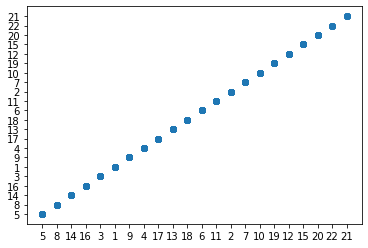

In [415]:
plt.scatter(y_train,tr1)
plt.show()

<AxesSubplot:xlabel='final_position', ylabel='Density'>

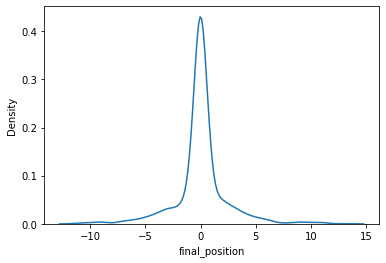

In [480]:
difference=y_test-y1
sns.kdeplot(difference)

0.6061151079136691

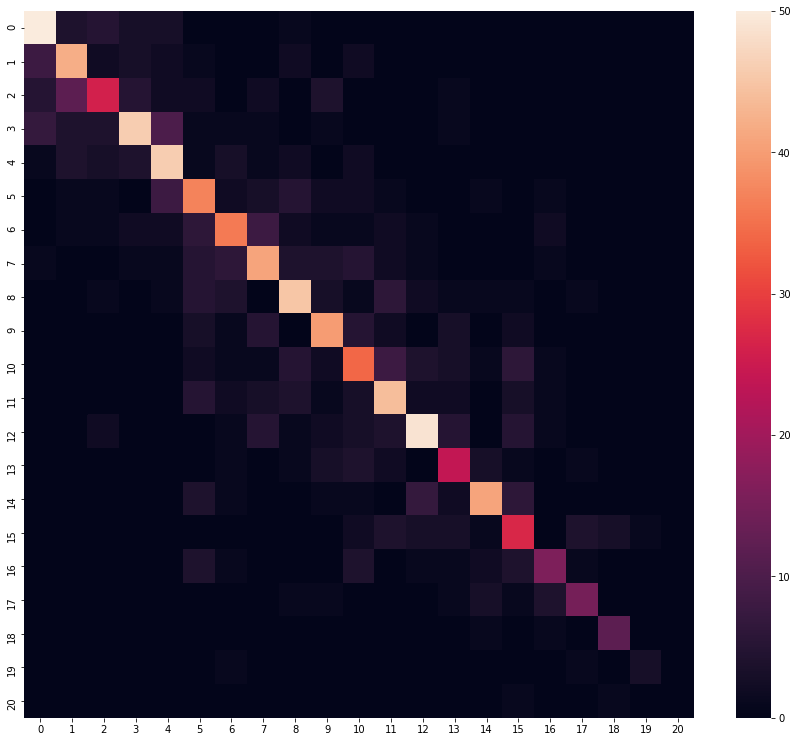

In [464]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y1))
plt.figure(figsize=(15,13))
sn.heatmap(cm)
score = accuracy_score(y_test, y1)
score

## RandomForest

In [465]:
rf=RandomForestClassifier(max_depth=107,random_state=8)
rf.fit(X_train, y_train)
tr2=rf.predict(X_train)
y2=rf.predict(X_test)

In [466]:
print('R squared via prediction on training set: ', r2_score(y_train, tr2))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

R squared via prediction on training set:  1.0
R squared via prediction on test set:  0.8758311650766117


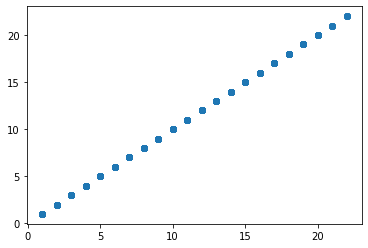

In [467]:
plt.scatter(y_train,tr2)
plt.show()

<AxesSubplot:xlabel='final_position', ylabel='Density'>

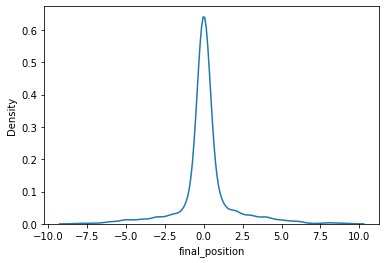

In [479]:
difference=y_test-y2
sns.kdeplot(difference)

0.6888489208633094

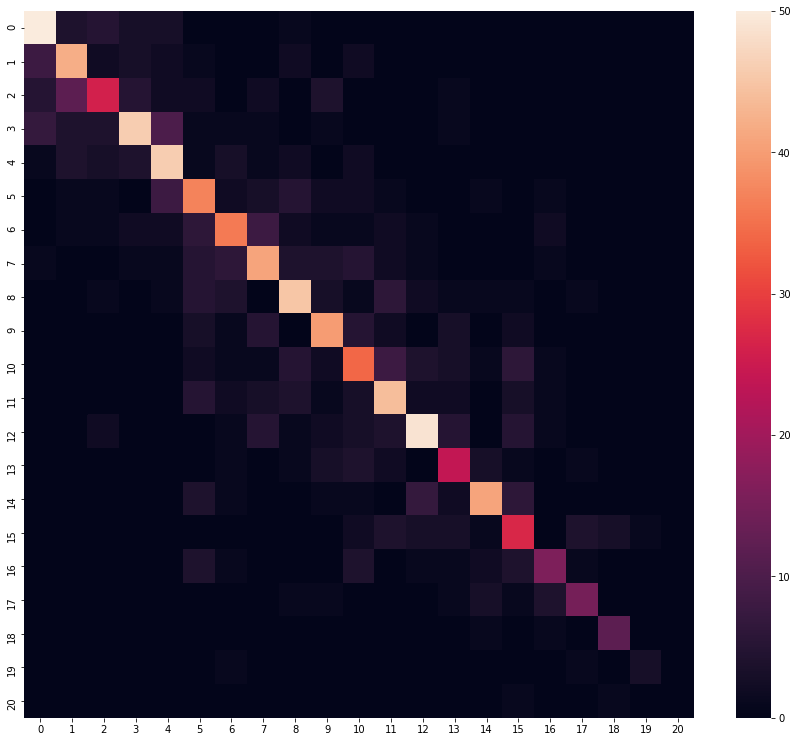

In [468]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y1))
plt.figure(figsize=(15,13))
sn.heatmap(cm)
score = accuracy_score(y_test, y2)
score

## SVM

In [469]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
tr3=clf.predict(X_train)
y3=clf.predict(X_test)

In [470]:
print('R squared via prediction on training set: ', r2_score(y_train, tr2))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

R squared via prediction on training set:  1.0
R squared via prediction on test set:  0.8758311650766117


<AxesSubplot:xlabel='final_position', ylabel='Density'>

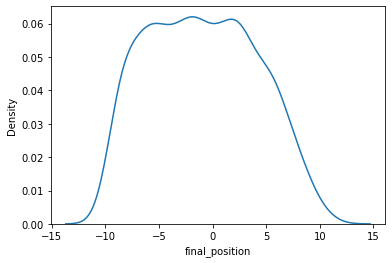

In [481]:
difference=y_test-y3
sns.kdeplot(difference)

0.6888489208633094

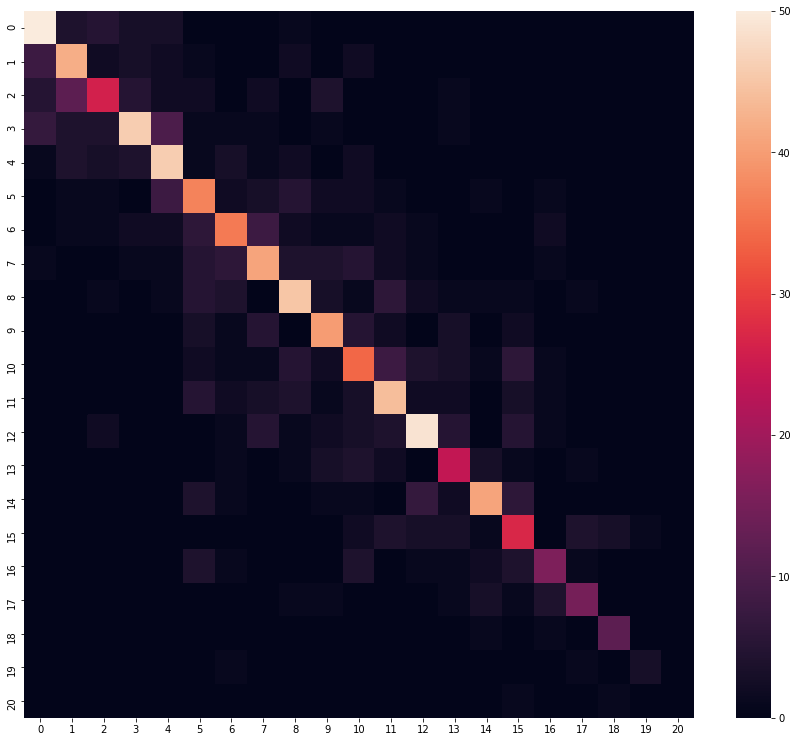

In [471]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y1))
plt.figure(figsize=(15,13))
sn.heatmap(cm)
score = accuracy_score(y_test, y2)
score

## ANN

In [518]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [512]:
#y_train=pd.get_dummies(y_train)

In [519]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [529]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(107, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='relu'))
ann.add(tf.keras.layers.Activation('softmax'))


In [530]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 107)               11128     
_________________________________________________________________
dense_98 (Dense)             (None, 1024)              110592    
_________________________________________________________________
dense_99 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_100 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 513       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 1,696,633
Trainable params: 1,696,633
Non-trainable params: 0
___________________________________________

In [531]:
ann.fit(X_train, y_train, epochs=15)


Epoch 1/15
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 2/15
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 3/15
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 4/15
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 5/15
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 6/15
105/105 [==============================] - 2s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 7/15
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 8/15
105/105 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 9/15
105/105 [==============================] - 2s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0555
Epoch 10/15
105/105 [==============================] - 